In [9]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os


In [18]:
# font_path = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/70816a43827731d40efe234b94feba96db91024f.asset/AssetData/NanumMyeongjo.ttc'

# # 폰트 이름 가져오기
# font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
# plt.rc('font', family=font_name)
# plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False


In [7]:
metro = np.load("npy/metro.npy",allow_pickle=True)

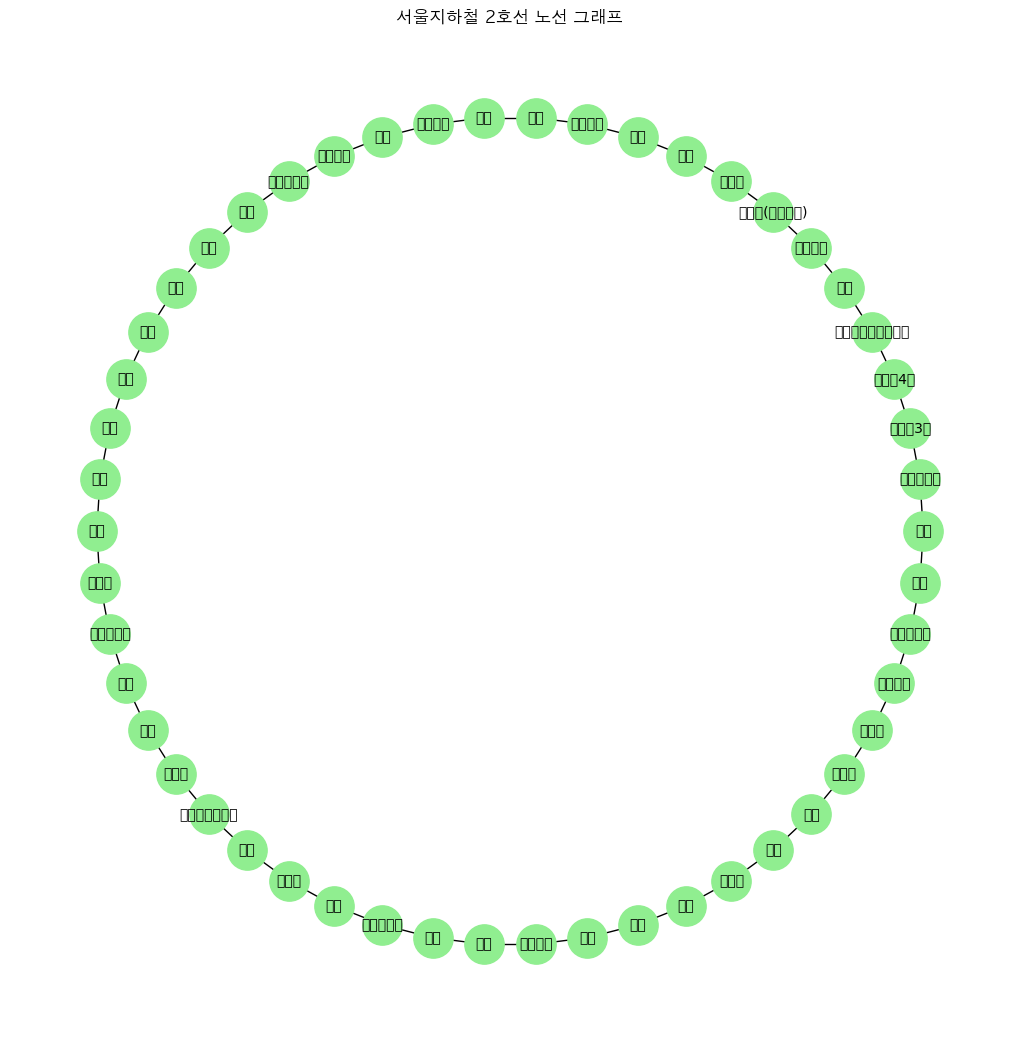

In [19]:
df = pd.DataFrame(metro, columns=["교통수단코드", "호선코드", "호선명", "역번호", "역명"])
line2 = df[df["호선코드"] == '2'].sort_values("역번호")
G = nx.Graph()

# 노드 추가 (역 이름 사용)
for idx, row in line2.iterrows():
    G.add_node(row["역명"])

# 엣지 추가 (연속된 역을 연결)
stations = list(line2["역명"])
for i in range(len(stations) - 1):
    G.add_edge(stations[i], stations[i+1])

# 마지막 역 ↔ 첫 역 연결 (순환선이므로)
G.add_edge(stations[-1], stations[0])

# 그리기
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G)  # 원형 배치 (순환선 표현)
nx.draw(G, pos, with_labels=True, node_size=800, font_size=10, node_color="lightgreen")
plt.title("서울지하철 2호선 노선 그래프")
plt.show()

/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52492 (\N{HANGUL SYLLABLE CON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

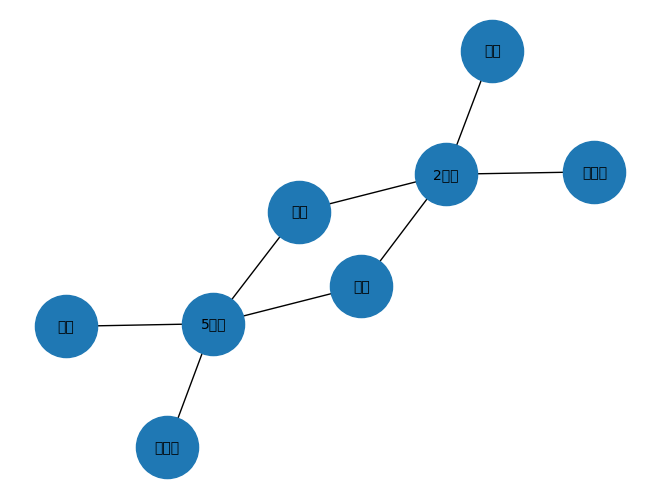

In [2]:

# 그래프 생성
G = nx.Graph()

# 호선 노드 추가
G.add_node("2호선")
G.add_node("5호선")

# 역 노드 추가
stations = ["신촌", "사당", "을지로", "선릉", "왕십리", "양정"]
G.add_nodes_from(stations)

# 환승 관계 (호선 ↔ 역)
G.add_edges_from([
    ("2호선", "신촌"),
    ("2호선", "사당"),
    ("2호선", "을지로"),
    ("2호선", "선릉"),
    ("5호선", "왕십리"),
    ("5호선", "신촌"),
    ("5호선", "양정"),
    ("5호선", "사당"),
])

# 그래프 그리기
nx.draw(G, with_labels=True, node_size=2000, font_size=10)
plt.show()